In [1]:
! pip install soundcard 


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /opt/homebrew/opt/python@3.12/bin/python3.12 -m pip install --upgrade pip
error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    

In [2]:
# AudioPython
#
# sample code to play audio through Python
# based on "soundcard",
# https://pypi.org/project/SoundCard/
# https://soundcard.readthedocs.io/en/latest/
# can be installed from anaconda prompt with "pip install soundcard"

# note: depending on your hardware, you might need to change the sample rate
# e.g, my laptop soundcard won't play at 48000 Hz, but 44100 Hz works nicely
# my focusrite soundcard plays 48000 nicely

import soundcard as sc
import numpy as np

# for wav-file input/output
from scipy.io import wavfile
import scipy.io


In [3]:
# get a list of all speakers:
speakers = sc.all_speakers()
# get the current default speaker on your system:
default_speaker = sc.default_speaker()
# get a list of all microphones:
mics = sc.all_microphones()
# get the current default microphone on your system:
default_mic = sc.default_microphone()


print(speakers,'\n')
print(default_speaker,'\n')
print(mics,'\n')
print(default_mic,'\n')

[<Speaker Højttalere i MacBook Pro (2 channels)>] 

<Speaker Højttalere i MacBook Pro (2 channels)> 

[<Microphone Mikrofon i MacBook Pro (1 channels)>] 

<Microphone Mikrofon i MacBook Pro (1 channels)> 



In [4]:
# Create and play 1 second of a 440 Hz tone in one channel

Fs=48000
t=np.linspace(0,1,Fs)
x=np.cos(2*np.pi*440*t)

default_speaker.play(x, samplerate=48000)

In [5]:
# record and play back one second of audio:


#use the default mic
data = default_mic.record(samplerate=44100, numframes=44100)

# use another microphone
# data = mics[1].record(samplerate=44100, numframes=44100)




default_speaker.play(data*5, samplerate=44100)

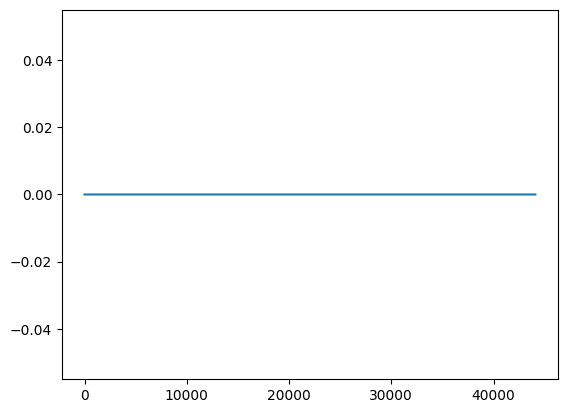

In [6]:
# visualize the recorded signal

import matplotlib.pyplot as plt
plt.figure()
plt.plot(data)

In [7]:
datasamplerate, data = wavfile.read('handel_audio.wav')
print("data type before conversion: ",data.dtype)
data=data/32768 # the data are 16 bits integers and must be scaled to the -1:1 range
print("data type after conversion: ",data.dtype)
print("Data are sampled at: ",datasamplerate)
print("Shape of data: ",data.shape)


default_speaker.play(data, samplerate=datasamplerate)

data2=data[0:-1:2] #decimate and play again (at half the samplerate)
default_speaker.play(data2, samplerate=0.5*datasamplerate)

data type before conversion:  int16
data type after conversion:  float64
Data are sampled at:  8192
Shape of data:  (73113,)


In [ ]:
# Create and play 5 seconds of a 440 Hz + 441 Hz beat

duration=1
Fs=48000
t=np.linspace(0,duration,Fs*duration)
x1=np.cos(2*np.pi*440*t)
x2=np.cos(2*np.pi*441*t)
x = (x1+x2)/2

default_speaker.play(x, samplerate=48000)

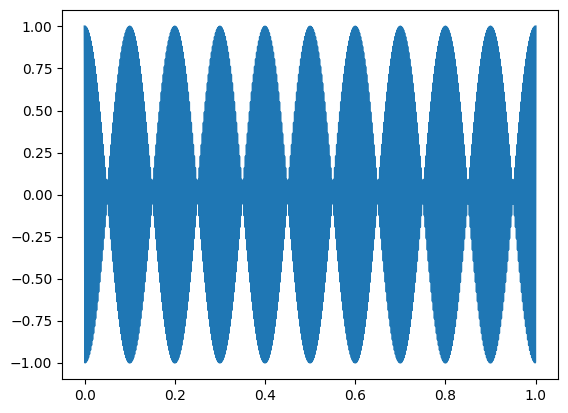

In [24]:
#visualize the signal
plt.figure()
plt.plot(t, x)